In [1]:
import pandas as pd #import all necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
arabic= list('ابتثجحخدذرزسشصضطظعغفقكلمنهوي') # create list of arabic alphabet
print(arabic, end=' ')

['ا', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ي'] 

In [3]:
x_train = pd.read_csv('D:/Games/DataSpell 2022.1/prjcts/dsProject/datasets/arab/csvTrainImages.csv') # load training images
y_train = pd.read_csv('D:/Games/DataSpell 2022.1/prjcts/dsProject/datasets/arab/csvTrainLabel.csv') # load training labels
x_test = pd.read_csv('D:/Games/DataSpell 2022.1/prjcts/dsProject/datasets/arab/csvTestImages.csv') # load test images
y_test = pd.read_csv('D:/Games/DataSpell 2022.1/prjcts/dsProject/datasets/arab/csvTestLabel.csv') # load test labels

In [4]:
print('%d training images, %d pixels (32x32)' % (x_train.shape[0], x_train.shape[1])) # some statistics about the data
print('%d training labels, %d classes (number of letters of the Arabic alphabet)' % (y_train.shape[0], len(y_train.value_counts())))
print('%d testing images, %d pixels (32x32)' % (x_test.shape[0], x_test.shape[1]))
print('%d testing labels, %d classes (number of letters of the Arabic alphabet)' % (y_test.shape[0], len(y_test.value_counts())))

13439 training images, 1024 pixels (32x32)
13439 training labels, 28 classes (number of letters of the Arabic alphabet)
3359 testing images, 1024 pixels (32x32)
3359 testing labels, 28 classes (number of letters of the Arabic alphabet)


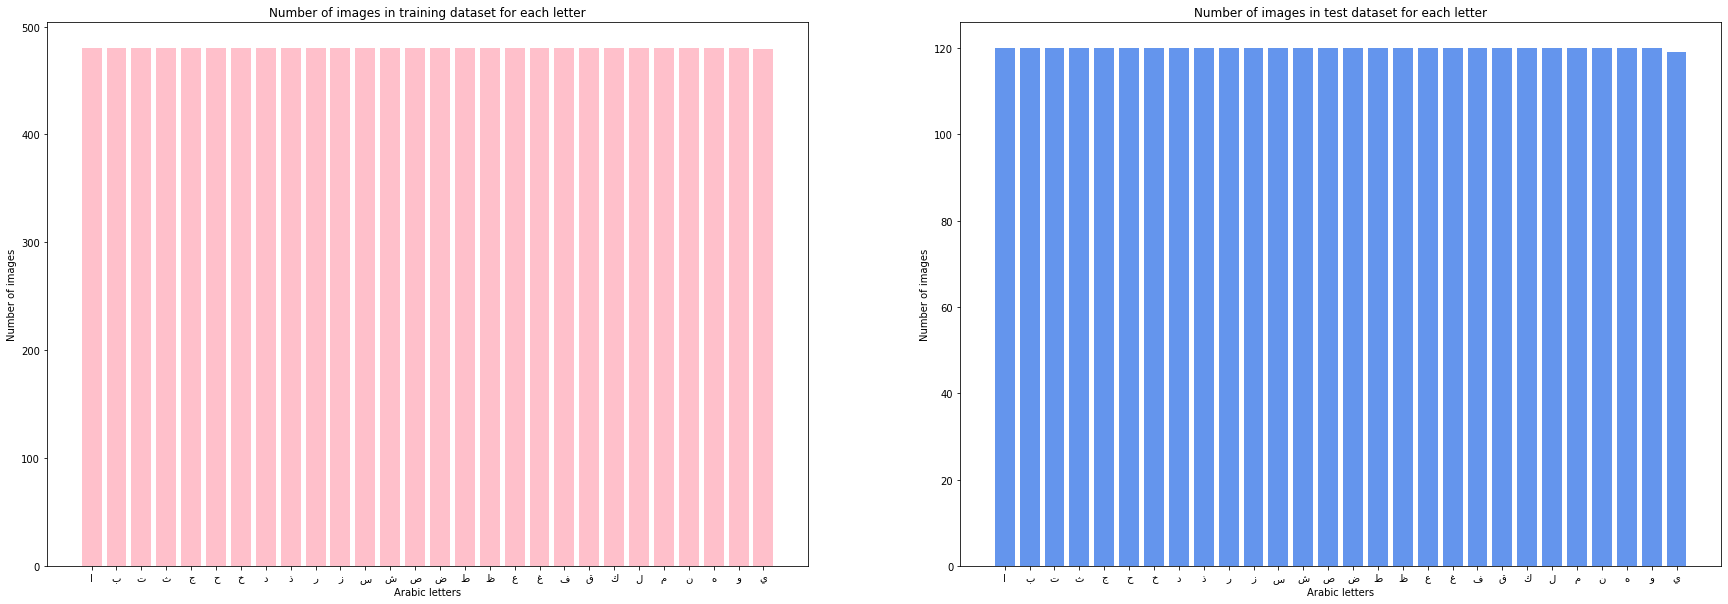

In [7]:
fig = plt.figure(figsize=(30, 10))

a = fig.add_subplot(121)
a.set_ylabel('Number of images')
a.set_xlabel('Arabic letters')
a.set_title('Number of images in training dataset for each letter')
a.bar(arabic, y_train.value_counts(), color='pink', linewidth=5)
b = fig.add_subplot(122)
b.set_xlabel('Arabic letters')
b.set_ylabel('Number of images')
b.set_title('Number of images in test dataset for each letter')
b.bar(arabic, y_test.value_counts(), color='cornflowerblue', linewidth=5)

plt.show() # now we see that test and training data we have evenly distributed

In [8]:
x_train = x_train.to_numpy() # convert dataframes to numpy
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

In [9]:
y_test=pd.get_dummies(y_test[:,0]) #        transform integers to a binary matrices
y_train=pd.get_dummies(y_train[:,0])

In [10]:
y_test

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3354,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3357,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
x_train = x_train.reshape(-1, 32, 32)
x_test = x_test.reshape(-1, 32, 32)
x_train = np.array([image.T for image in x_train]) #our images were turned to the side, so we transpose the matrices
x_test = np.array([image.T for image in x_test])

In [12]:
print(type(x_test))
print('train sizes: images -', x_train.shape, 'labels -',y_train.shape) #data sizes after reshaping
print('test sizes: images -', x_test.shape, 'labels -', y_test.shape)

<class 'numpy.ndarray'>
train sizes: images - (13439, 32, 32) labels - (13439, 28)
test sizes: images - (3359, 32, 32) labels - (3359, 28)


In [13]:
x_train = x_train / 255 # normalize our train images by making them into range [0;1]
x_test = x_test / 255 # normalize our test images by making them into range [0;1]

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense, Flatten


def create_model(activation='relu', optimizer='adam', kernel_initializer='uniform'): # creating our model
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 1), activation=activation, # convolutional input layer, expecting images
                     kernel_initializer=kernel_initializer))
    model.add(MaxPooling2D(2, 2)) # reduce overfitting and training time
    model.add(BatchNormalization()) # faster learning and higher overall accuracy

    model.add(Conv2D(64, (3, 3), padding='same', activation=activation, kernel_initializer=kernel_initializer))
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.2)) # turns off 20% of neurons in the layer to reduce overfitting
    model.add(BatchNormalization())

    model.add(Conv2D(128, (3, 3), padding='same', activation=activation, kernel_initializer=kernel_initializer))
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Flatten())

    model.add(Dense(28, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(28, activation='softmax')) # output layer with 28 neurons for each letter

    model.compile(optimizer=optimizer, # compile our model
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [15]:
model = create_model(optimizer='adam',
                     kernel_initializer='uniform',
                     activation='relu')
model.summary() # summary of our model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                        

In [16]:
history=model.fit(x_train.reshape(-1, 32, 32, 1), y_train, epochs=25, validation_split=0.2, batch_size=64) # now we train our model and save history for plots

Epoch 1/25
168/168 [==============================] - 15s 83ms/step - loss: 2.8003 - accuracy: 0.3290 - val_loss: 4.6567 - val_accuracy: 0.0357
Epoch 2/25
168/168 [==============================] - 16s 93ms/step - loss: 1.4600 - accuracy: 0.6943 - val_loss: 5.5089 - val_accuracy: 0.0357
Epoch 3/25
168/168 [==============================] - 14s 85ms/step - loss: 0.8669 - accuracy: 0.8305 - val_loss: 4.3264 - val_accuracy: 0.0376
Epoch 4/25
168/168 [==============================] - 14s 83ms/step - loss: 0.5976 - accuracy: 0.8897 - val_loss: 1.2005 - val_accuracy: 0.7050
Epoch 5/25
168/168 [==============================] - 15s 88ms/step - loss: 0.4771 - accuracy: 0.9091 - val_loss: 0.6293 - val_accuracy: 0.8445
Epoch 6/25
168/168 [==============================] - 14s 84ms/step - loss: 0.4021 - accuracy: 0.9248 - val_loss: 0.5758 - val_accuracy: 0.8586
Epoch 7/25
168/168 [==============================] - 14s 86ms/step - loss: 0.3514 - accuracy: 0.9368 - val_loss: 0.4363 - val_accuracy:

In [17]:
model.evaluate(x_test.reshape(-1, 32, 32, 1), y_test) # how our model behaves on test data

105/105 [==============================] - 1s 8ms/step - loss: 0.3637 - accuracy: 0.9309


[0.36366549134254456, 0.930931806564331]

In [18]:
x_train.shape, y_train.shape

((13439, 32, 32), (13439, 28))

In [19]:
accuracy = history.history['accuracy'] # for accuracy plot
val_accuracy = history.history['val_accuracy']
loss = history.history['loss'] # for loss plot
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

<Figure size 432x288 with 0 Axes>

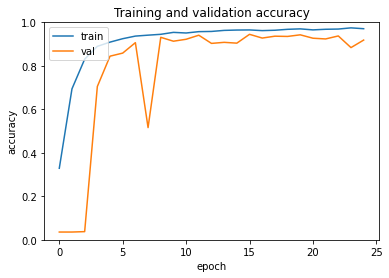

<Figure size 432x288 with 0 Axes>

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.figure()

Text(0.5, 0, 'epoch')

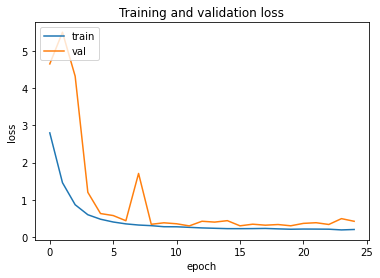

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.legend(['train', 'val'], loc='upper left')
plt.ylabel('loss')
plt.xlabel('epoch')

### From both graphs we see that we have no overfitting, both graphs grow with increasing epochs

In [25]:
prediction = model.predict(x_test)
prediction = np.argmax(prediction, axis=1)
print(prediction)

[ 0  1  1 ... 26 27 27]


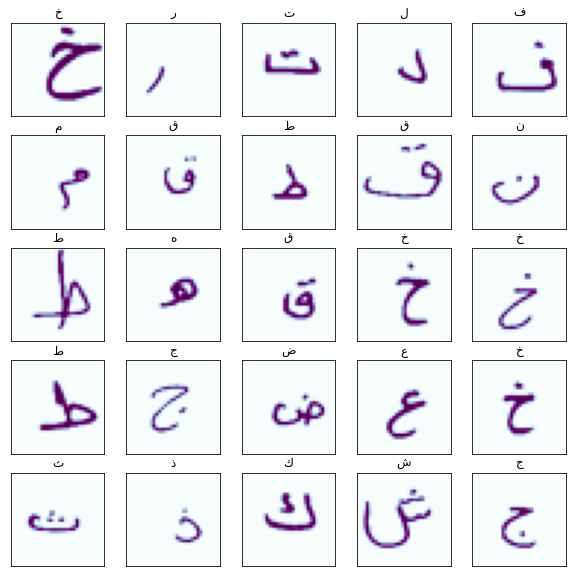

In [23]:
plt.figure(figsize=(10, 10))

for i in range(25): # now let’s see how our model predicts letters in practice
    rand = np.random.randint(0, 3359)
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[rand].reshape(32, 32), "BuPu")
    plt.title(arabic[prediction[rand]])
plt.show()